# Simulation of NMR CPMG experiments with ipywidgets

When **this notebook is opened**, then select in the menu, Kernel -> Restart & Run all.<br>
This is to refresh the widgets.

* [This noteboook is available at github.com/tlinnet/mybinder_relax](https://github.com/tlinnet/mybinder_relax/blob/master/CPMG_tcp.ipynb)

* [The widgets can be seen at mybinder.org by clicking here](https://mybinder.org/v2/gh/tlinnet/mybinder_relax/master?filepath=CPMG_tcp.ipynb)


## Import code

In [1]:
# Import python packages
import numpy as np
# Plotting
# Set backend.
# This must be done before importing.
#%matplotlib inline
%matplotlib notebook
import matplotlib.pylab as plt

 Examine how CPMG frequency is calculated

In [2]:
from IPython.display import Image
Image(url= "images/CPMG_pulse.png")

In [3]:
# Calc v CPMG
def calc_cpmg_frqs_linspace_cpmg(cpmg_e=None, relax_time=None):
    """
    @keyword cpmg_e:     The end value of the CPMG pulse train. In Hz.
    @keyword relax_time: The experiment specific fixed time period for relaxation (in seconds).
    """
    # Make x values. In Hz.
    # First find minimum v_cpmg. The minimum number of recycling pulses is 1.
    v_min = 1. / relax_time
    # Round up to nearest 10
    #v_min = v_min + (- v_min % 10 )
    x_cpmg_frqs = np.linspace(v_min, cpmg_e, num=1000)

    # Collect power
    power_arr = []
    tau_cpmg_arr = []
    for cpmg_frq in x_cpmg_frqs:
        # num_cpmg
        power = int(round(cpmg_frq * relax_time))
        power_arr.append(power)
        # tcp
        tau_cpmg = 0.25 * relax_time / power
        tau_cpmg_arr.append(tau_cpmg)
    # Convert to numpy
    num_cpmg = np.asarray(power_arr)
    tcp = np.asarray(tau_cpmg_arr)
    return x_cpmg_frqs, num_cpmg, tcp

def calc_cpmg_frqs_tau(cpmg_e=None, relax_time=None):
    """
    @keyword cpmg_e:     The end value of the CPMG pulse train. In Hz.
    @keyword relax_time: The experiment specific fixed time period for relaxation (in seconds).
    """

    # First find the maximum number of recycling pulses
    Ncyc_max = cpmg_e * relax_time
    # Round up to nearest 1
    Ncyc_max = int(Ncyc_max + (- Ncyc_max % 1 ) )
    # Then make a range of Ncyc
    Ncyc_range = range(1, Ncyc_max+1)
    # Loop over Ncyc, and calculate
    tau_cpmg_arr = []
    cpmg_frqs_arr = []
    for Ncyc in Ncyc_range:
        # tcp. 2tcp is the time between the centers of successive 180 pulses in the CPMG sequence.
        tau_cpmg = relax_time / (4.*Ncyc)
        tau_cpmg_arr.append(tau_cpmg)
        # Calculate CPMG pulse train frequency v [Hz]
        cpmg_frq = 1. / (4.*tau_cpmg)
        cpmg_frqs_arr.append(cpmg_frq)
        # Calculate time between refocusing pulses
    # Convert to numpy
    num_cpmg = np.asarray(Ncyc_range)
    tcp = np.asarray(tau_cpmg_arr)
    x_cpmg_frqs = np.asarray(cpmg_frqs_arr)
    return x_cpmg_frqs, num_cpmg, tcp

<IPython.core.display.Javascript object>


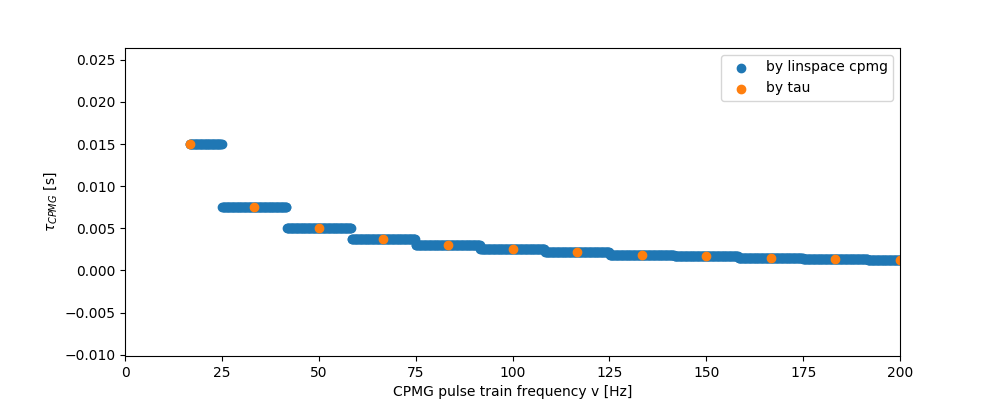

(0, 200)

In [4]:
# Examine result
cpmg_e = 200
x_cpmg_frqs_1, num_cpmg_1, tcp_1 = calc_cpmg_frqs_linspace_cpmg(cpmg_e=cpmg_e, relax_time=0.06)
x_cpmg_frqs_2, num_cpmg_2, tcp_2 = calc_cpmg_frqs_tau(cpmg_e=cpmg_e, relax_time=0.06)
fig, ax = plt.subplots(1, figsize=(10, 4))
ax.scatter(x_cpmg_frqs_1, tcp_1, label="by linspace cpmg")
ax.scatter(x_cpmg_frqs_2, tcp_2, label="by tau")
ax.legend(loc='upper right')
ax.set_xlabel("CPMG pulse train frequency v [Hz]")
ax.set_ylabel("$\\tau_{CPMG}$ [s]")
#ax.set_title("Pulses")
ax.set_xlim(0, cpmg_e)